In [2]:
import os
import xml
import pandas as pd
import numpy as np
import skimage.transform as skTrans
import nibabel as nib
import sys
import time
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
information_table=pd.DataFrame(None,columns=['Image ID','group', 'PATNO Visit'])

In [4]:
filepath='../MRI_nobrain/'
files= [filename.split('.')[0].split('_')[-1] for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath,filename))]

In [5]:
files

['I785358',
 'I850059',
 'I476311',
 'I696778',
 'I993951',
 'I526726',
 'I405842',
 'I475905',
 'I333354',
 'I406748',
 'I330120',
 'I330133',
 'I330401',
 'I330414',
 'I406752',
 'I330427',
 'I330440',
 'I330453',
 'I330466',
 'I429650',
 'I693531',
 'I330479',
 'I330491',
 'I407111',
 'I330505',
 'I333364',
 'I330518',
 'I330530',
 'I370196',
 'I429649',
 'I330555',
 'I406839',
 'I330567',
 'I406856',
 'I330589',
 'I452935',
 'I486612',
 'I330608',
 'I406791',
 'I785341',
 'I330618',
 'I407098',
 'I452653',
 'I330628',
 'I407209',
 'I459688',
 'I848727',
 'I486666',
 'I405854',
 'I405873',
 'I460087',
 'I849980',
 'I370249',
 'I405833',
 'I460317',
 'I850040',
 'I405810',
 'I407295',
 'I459474',
 'I994122',
 'I405880',
 'I455659',
 'I993622',
 'I405975',
 'I370260',
 'I407286',
 'I476048',
 'I849687',
 'I407257',
 'I407386',
 'I428351',
 'I849632',
 'I407388',
 'I452418',
 'I407333',
 'I452319',
 'I525991',
 'I994414',
 'I407355',
 'I451674',
 'I994331',
 'I330638',
 'I330648',
 'I4

In [6]:
information_table['Image ID']=files

In [7]:
information_table

,Image ID,group,PATNO Visit
0,I785358,NaN,NaN
1,I850059,NaN,NaN
2,I476311,NaN,NaN
3,I696778,NaN,NaN
4,I993951,NaN,NaN
...,...,...,...
814,I696889,NaN,NaN
815,I994272,NaN,NaN
816,I525970,NaN,NaN
817,I696817,NaN,NaN


In [8]:
PPMI_MRI_information=pd.read_csv('PPMI_MRI_information.csv')

In [9]:
PPMI_MRI_information

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I993557,85242,Prodromal,M,66,V06,MRI,T1-anatomical,Processed,2/08/2017,NiFTI,NaN
1,I696817,85242,Prodromal,M,65,V04,MRI,T1-anatomical,Processed,2/03/2016,NiFTI,NaN
2,I525970,85242,Prodromal,M,64,BL,MRI,T1-anatomical,Processed,2/18/2015,NiFTI,NaN
3,I696889,85236,Prodromal,M,68,V04,MRI,T1-anatomical,Processed,1/13/2016,NiFTI,NaN
4,I994272,85236,Prodromal,M,69,V06,MRI,T1-anatomical,Processed,1/25/2017,NiFTI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
814,I993951,16644,Prodromal,M,66,V06,MRI,T1-anatomical,Processed,10/27/2016,NiFTI,NaN
815,I696778,16644,Prodromal,M,65,V04,MRI,T1-anatomical,Processed,10/29/2015,NiFTI,NaN
816,I476311,15761,Prodromal,F,70,BL,MRI,T1-anatomical,Processed,9/30/2014,NiFTI,NaN
817,I850059,14426,Prodromal,M,61,BL,MRI,T1-anatomical,Processed,2/26/2014,NiFTI,NaN


## 获取基本信息

In [10]:
PPMI_MRI_information['Group'].value_counts()

PD           532
Control      133
Prodromal     81
SWEDD         73
Name: Group, dtype: int64

In [16]:
PPMI_MRI_information[PPMI_MRI_information['Group']=='SWEDD']['Sex'].value_counts()

M    46
F    27
Name: Sex, dtype: int64

In [ ]:
np.mean(PPMI_MRI_information[PPMI_MRI_information['Group']=='Prodromal']['Age'])

65.07407407407408

In [28]:
np.std(PPMI_MRI_information[PPMI_MRI_information['Group']=='Prodromal']['Age'])

7.9950258884806615

In [11]:
sum(PPMI_MRI_information['Age'])/len(PPMI_MRI_information['Age'])-min(PPMI_MRI_information['Age'])

31.48962148962149

## 切换回预处理

In [9]:
for i in range(len(information_table)):
    information_table['PATNO Visit'][i]=str(PPMI_MRI_information[PPMI_MRI_information['Image Data ID']==information_table['Image ID'][i]]['Subject'].values[0])+'_'+PPMI_MRI_information[PPMI_MRI_information['Image Data ID']==information_table['Image ID'][i]]['Visit'].values[0]
    information_table['group'][i]=PPMI_MRI_information[PPMI_MRI_information['Image Data ID']==information_table['Image ID'][i]]['Group'].values[0]

In [10]:
information_table

,Image ID,group,PATNO Visit
0,I785358,Prodromal,14426_V06
1,I850059,Prodromal,14426_BL
2,I476311,Prodromal,15761_BL
3,I696778,Prodromal,16644_V04
4,I993951,Prodromal,16644_V06
...,...,...,...
814,I696889,Prodromal,85236_V04
815,I994272,Prodromal,85236_V06
816,I525970,Prodromal,85242_BL
817,I696817,Prodromal,85242_V04


In [11]:
information_table['group'].value_counts()

PD           532
Control      133
Prodromal     81
SWEDD         73
Name: group, dtype: int64

In [1]:
532+133+81+73

819

In [12]:
label_set={'Control':0,'PD':1,'Prodromal':2,'SWEDD':3}

In [13]:
information_table['group']=information_table['group'].map(label_set)

In [14]:
information_table

,Image ID,group,PATNO Visit
0,I785358,2,14426_V06
1,I850059,2,14426_BL
2,I476311,2,15761_BL
3,I696778,2,16644_V04
4,I993951,2,16644_V06
...,...,...,...
814,I696889,2,85236_V04
815,I994272,2,85236_V06
816,I525970,2,85242_BL
817,I696817,2,85242_V04


In [15]:
information_table[information_table['PATNO Visit']=='60044_V06']

,Image ID,group,PATNO Visit
799,I849356,2,60044_V06


In [16]:
information_table['group'].value_counts()

1    532
0    133
2     81
3     73
Name: group, dtype: int64

In [17]:
meta_all = pd.DataFrame(columns = ["img_array","label","PATNO Visit"])

In [18]:
# def normalize_img(img_array):
#     maxes = np.quantile(img_array,0.995,axis=(0,1))
#     #print("Max value for each modality", maxes)
#     return img_array/maxes

In [19]:
information_table['Image ID'].values.tolist()

['I785358',
 'I850059',
 'I476311',
 'I696778',
 'I993951',
 'I526726',
 'I405842',
 'I475905',
 'I333354',
 'I406748',
 'I330120',
 'I330133',
 'I330401',
 'I330414',
 'I406752',
 'I330427',
 'I330440',
 'I330453',
 'I330466',
 'I429650',
 'I693531',
 'I330479',
 'I330491',
 'I407111',
 'I330505',
 'I333364',
 'I330518',
 'I330530',
 'I370196',
 'I429649',
 'I330555',
 'I406839',
 'I330567',
 'I406856',
 'I330589',
 'I452935',
 'I486612',
 'I330608',
 'I406791',
 'I785341',
 'I330618',
 'I407098',
 'I452653',
 'I330628',
 'I407209',
 'I459688',
 'I848727',
 'I486666',
 'I405854',
 'I405873',
 'I460087',
 'I849980',
 'I370249',
 'I405833',
 'I460317',
 'I850040',
 'I405810',
 'I407295',
 'I459474',
 'I994122',
 'I405880',
 'I455659',
 'I993622',
 'I405975',
 'I370260',
 'I407286',
 'I476048',
 'I849687',
 'I407257',
 'I407386',
 'I428351',
 'I849632',
 'I407388',
 'I452418',
 'I407333',
 'I452319',
 'I525991',
 'I994414',
 'I407355',
 'I451674',
 'I994331',
 'I330638',
 'I330648',
 'I4

In [42]:
def create_dataset(meta, meta_all,path_to_datadir):
    files = os.listdir(path_to_datadir)
    # target_shape = (72, 72, 72)
    meta_list=meta['Image ID'].values.tolist()
    count=0
    for file in files:
        # print(file)
        print(count)
        count+=1
        if file != '.DS_Store':
            path = os.path.join(path_to_datadir, file)
            # print(path)
            img_id = file.split('.nii')[0].split('_')[-1]
            # print(img_id)
            if img_id in meta_list:
                idx = meta[meta["Image ID"] == img_id].index[0]
                # print(idx)
                im = nib.load(path).get_fdata()
                # im_resized = skTrans.resize(im, target_shape, order=1, preserve_range=True)
                # # print(im.shape)
                n_i, n_j, n_k = im.shape
                center_i = (n_i - 1) // 2
                center_j = (n_j - 1) // 2
                center_k = (n_k - 1) // 2
                im1 = skTrans.resize(im[center_i, :, :], (72, 72), order=1, preserve_range=True)
                im2 = skTrans.resize(im[:, center_j, :], (72, 72), order=1, preserve_range=True)
                im3 = skTrans.resize(im[:, :, center_k], (72, 72), order=1, preserve_range=True)
                im = np.array([im1,im2,im3])
                # im = np.array([im_resized])
                # print(im.shape)
                # break
                label = meta.at[idx, "group"]
                subject = meta.at[idx, "PATNO Visit"]
                # norm_im = normalize_img(im)
                # meta_all = meta_all.append({"img_array": norm_im,"label": label,"PATNO Visit":subject}, ignore_index=True)
                new_row = pd.DataFrame({"img_array": [im], "label": [label], "PATNO Visit": [subject]})
                meta_all = pd.concat([meta_all, new_row], ignore_index=True)

    meta_all.to_pickle("MRI_processed_nobrain/mri_meta_2D_4class_nobrain.pkl")
    # meta_all.to_pickle("MRI_processed_3D/mri_meta_3D.pkl")
    # meta_all.flush()
    # os.fsync(meta_all.fileno())
    # time.sleep(0.5)

In [43]:
#wjk-AD三分类-2文件夹中内容为wjk-AD三分类中的所有nii文件（不分AD、NC、MCI文件夹）
create_dataset(information_table, meta_all, '../MRI_nobrain/')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [44]:
#reading in a dataframe that contains image arrays, patient IDs ("subject"), and diagnosis
m2 = pd.read_pickle("MRI_processed_nobrain/mri_meta_2D_4class_nobrain.pkl")

In [45]:
m2['img_array'][0].shape

(3, 72, 72)

In [46]:
m2['img_array'].shape

(819,)

In [47]:
m2['label'].value_counts()

1    532
0    133
2     81
3     73
Name: label, dtype: int64

In [48]:
m2['img_array'][0].shape

(3, 72, 72)

In [2]:
im = nib.load('../MRI_nobrain/PPMI_14426_MR_T1-anatomical_Br_20161020185834039_S405053_I785358.nii').get_fdata()
# im_resized = skTrans.resize(im, target_shape, order=1, preserve_range=True)
# # print(im.shape)
n_i, n_j, n_k = im.shape
center_i = (n_i - 1) // 2
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2
im1 = skTrans.resize(im[center_i, :, :], (72, 72), order=1, preserve_range=True)
im2 = skTrans.resize(im[:, center_j, :], (72, 72), order=1, preserve_range=True)
im3 = skTrans.resize(im[:, :, center_k], (72, 72), order=1, preserve_range=True)

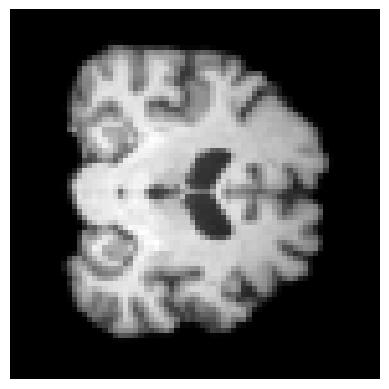

In [11]:
plt.imshow(im2, cmap='gray')
plt.axis('off')
plt.imsave('see_picture/2.png', im2, cmap='gray')